In [1]:
from pathlib import Path
notebook_path = Path().cwd().parent.parent.parent.parent
import sys; sys.path.insert(0, str(notebook_path))

import pandas as pd
import plotly.express as px
import warnings

from explore.gcp.storage import gcp
from explore.src.preprocess.clean_stats import Cleaning
from explore.src.visualisation.stats_visual import StatsVisuals
from explore.src.utilities.eda_funcs import describe_data

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = gcp.read_df_from_bucket('fbref_db', 'possession.csv')

[02/17/24 12:12:28] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=103616;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=521731;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=378329;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=644010;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [4]:
df.head()

,rk,player,nation,pos,squad,comp,age,born,90s,touches,def_pen_area_touches,def_third_touches,mid_third_touches,att_third_touches,att_pen_area_touches,live_ball_touches,take_ons_attempted,take_ons_successful,take_on_succ_pct,take_ons_tackled,take_on_tackled_pct,carries,total_distance_carried,progressive_carries_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,passes_received,progressive_passes_received,season
0,1,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,26.0,1990.0,24.3,1435.0,90.0,445.0,616.0,391.0,32.0,1435.0,31.0,26.0,83.9,5.0,16.1,717.0,3714.0,1966.0,46.0,33.0,7.0,37.0,18.0,711.0,86.0,2017-2018
1,2,Rolando Aarons,ENG,"MF,FW",Newcastle Utd,Premier League,21.0,1995.0,1.5,65.0,0.0,11.0,30.0,25.0,3.0,65.0,6.0,4.0,66.7,2.0,33.3,37.0,380.0,127.0,7.0,3.0,3.0,4.0,6.0,39.0,4.0,2017-2018
2,3,Rolando Aarons,ENG,"MF,FW",Hellas Verona,Serie A,21.0,1995.0,5.7,166.0,3.0,18.0,71.0,80.0,7.0,166.0,15.0,8.0,53.3,7.0,46.7,105.0,712.0,352.0,9.0,11.0,2.0,9.0,13.0,125.0,31.0,2017-2018
3,4,Ignazio Abate,ITA,DF,Milan,Serie A,30.0,1986.0,11.7,864.0,35.0,237.0,428.0,206.0,8.0,864.0,1.0,0.0,0.0,1.0,100.0,386.0,1802.0,1124.0,20.0,18.0,0.0,7.0,6.0,563.0,65.0,2017-2018
4,5,Aymen Abdennour,TUN,DF,Marseille,Ligue 1,27.0,1989.0,5.5,375.0,27.0,175.0,200.0,4.0,2.0,375.0,1.0,1.0,100.0,0.0,0.0,296.0,1522.0,829.0,2.0,1.0,0.0,0.0,1.0,278.0,0.0,2017-2018


Clean dataset

In [5]:
df = Cleaning(df).pipeline()

SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-SCT', country_code='GB', name='Scotland', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB', name='England', parent_code=None, type='Country')
SubdivisionHierarchy(code='GB-ENG', country_code='GB',

In [6]:
describe_data(df)

,Data Types,Null Counts,Null %,Unique Values,Min,Max,Median,Mean,Std Dev,Outliers,Outliers %
rk,int64,0,0.00,2920,1.0,2920.0,1366.0,1371.01,796.36,0,0.00
age,float64,3,0.02,29,14.0,42.0,25.0,25.34,4.53,19,0.10
born,float64,3,0.02,32,1977.0,2008.0,1995.0,1994.35,4.92,38,0.20
90s,float64,0,0.00,381,0.0,38.0,11.8,13.44,10.64,0,0.00
touches,float64,22,0.12,2554,0.0,3769.0,586.5,738.70,651.83,164,0.86
def_pen_area_touches,float64,22,0.12,876,0.0,1421.0,21.0,74.50,171.99,2017,10.55
def_third_touches,float64,22,0.12,1364,0.0,2006.0,111.0,232.06,292.90,1324,6.92
mid_third_touches,float64,22,0.12,1526,0.0,2496.0,240.0,341.45,349.17,468,2.45
att_third_touches,float64,22,0.12,965,0.0,1687.0,96.0,172.64,200.59,777,4.06
att_pen_area_touches,float64,22,0.12,241,0.0,302.0,13.0,24.89,34.17,1396,7.30


Initial visualisations

In [7]:
carries_final_third = df.sort_values("carries_into_final_third", ascending=False).head(
    10
)
carries_final_third["player_graph"] = (
    carries_final_third["player"] + " - " + carries_final_third["season"]
)

# plot graph
graph = px.histogram(
    carries_final_third,
    x="player_graph",
    y="carries_into_final_third",
    color="player",
    title="Carries into final third",
)
graph.update_layout(showlegend=False)
graph.show()

In [8]:
# relationship between touches in the penalty area and take ons attempted
px.scatter(
    data_frame=df,
    x="progressive_passes_received",
    y="att_pen_area_touches",
    color="pos",
    hover_data=["player", "season"],
    title="Touches in the penalty area vs progressive passes received",
)

In [9]:
df_plots = StatsVisuals(df)

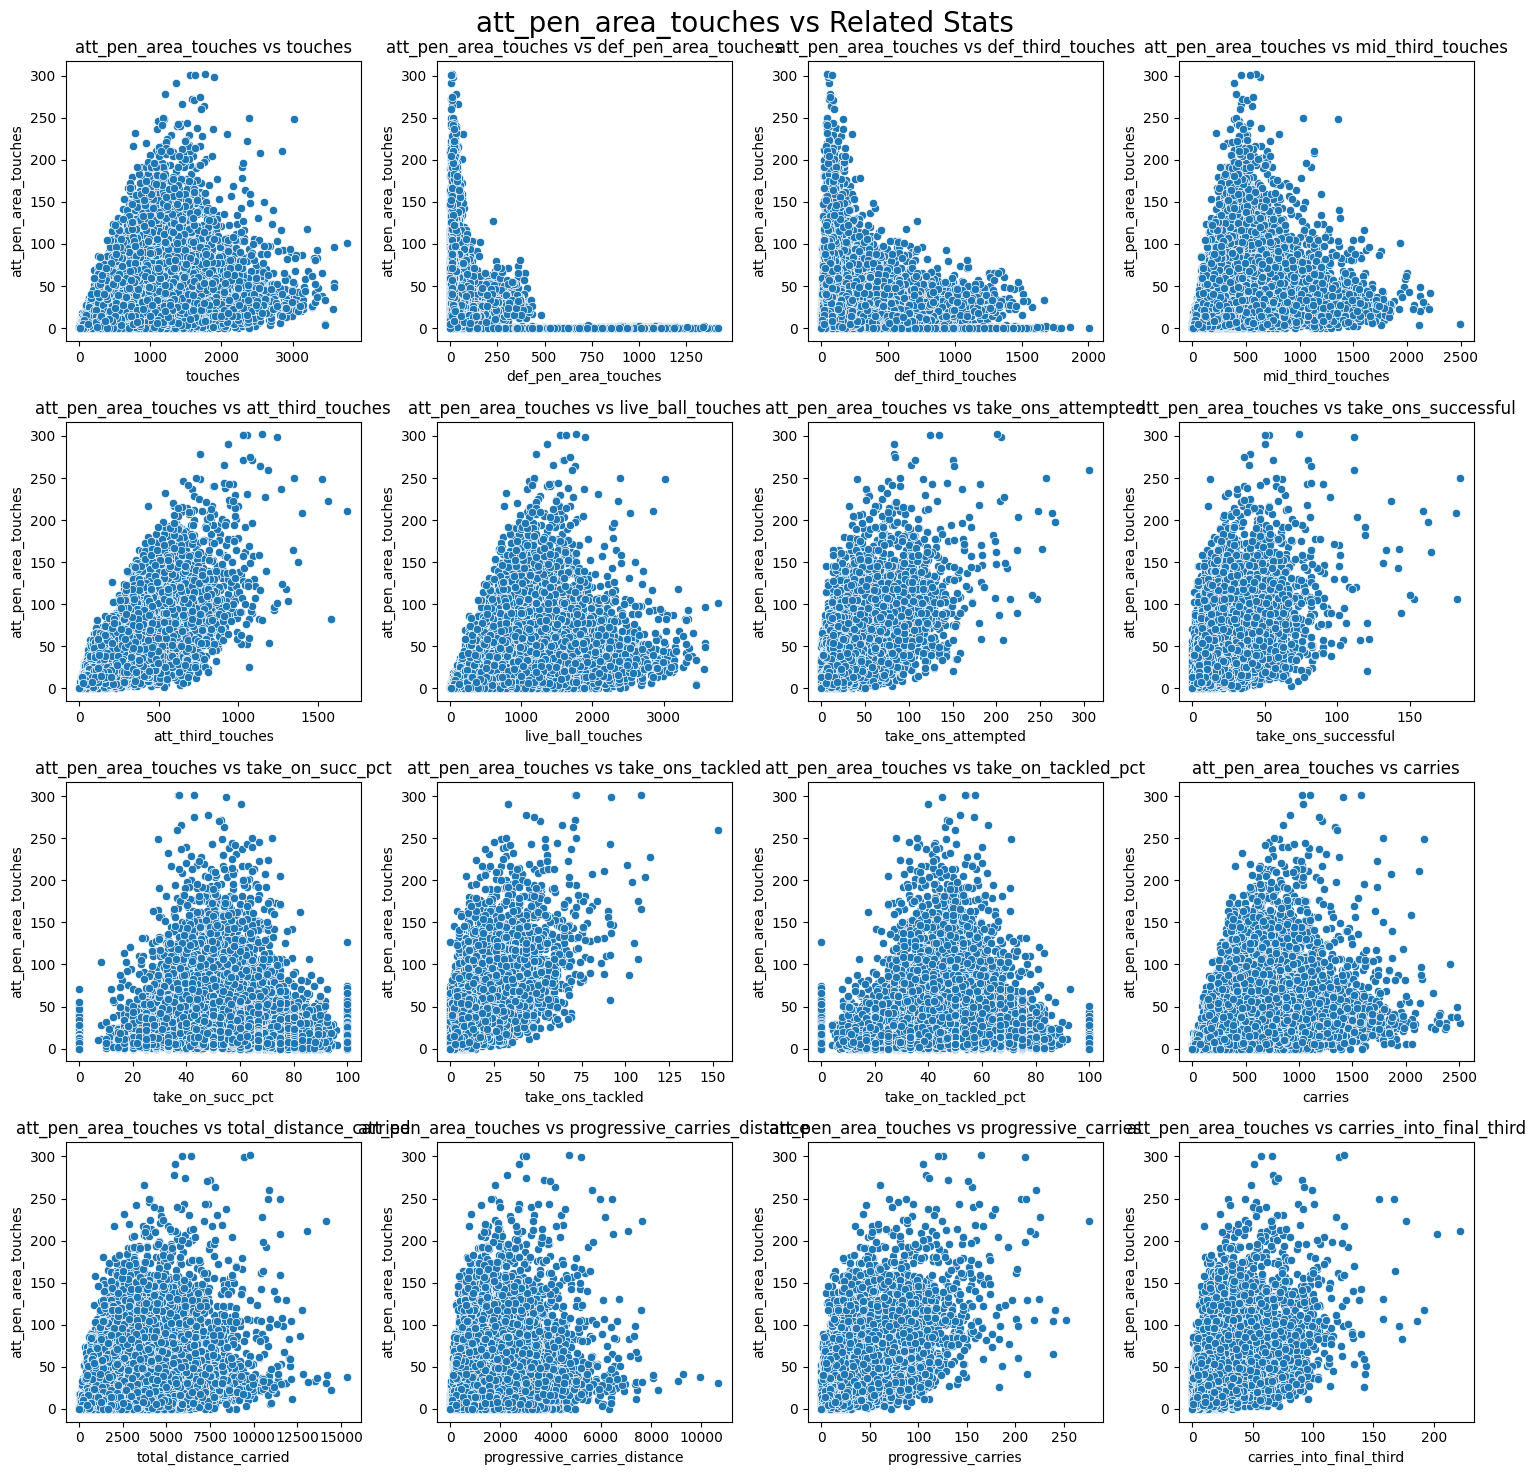

In [10]:
y = "att_pen_area_touches"
X = [col for col in df.columns[9:-5] if col != y]
df_plots.relationships(y=y, X=X)

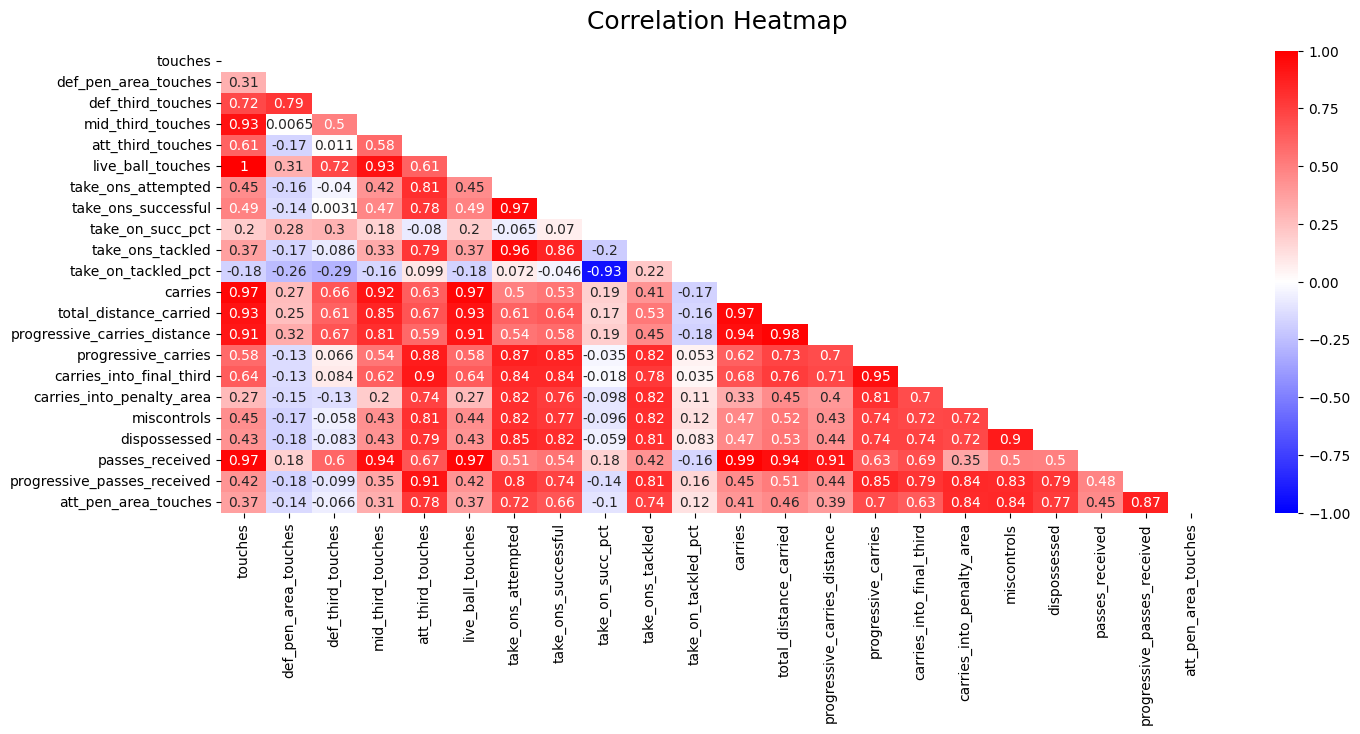

In [11]:
df_plots.correlation_matrix(vars=X + [y])

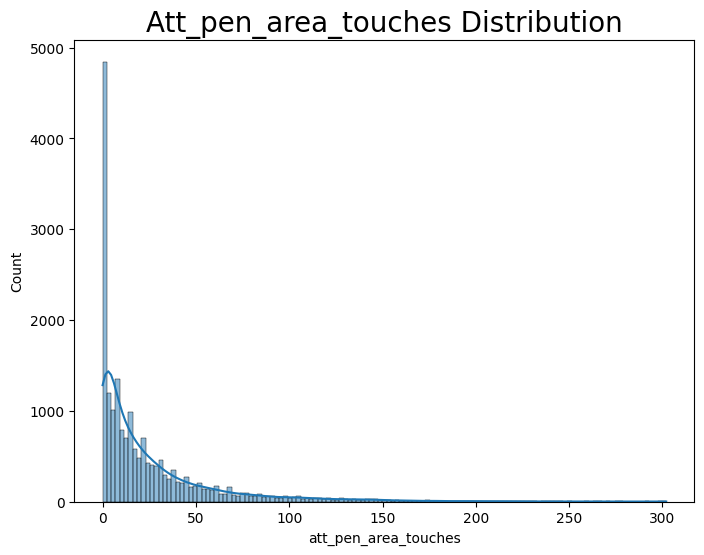

In [13]:
df_plots.distribution(y, save_to=None)

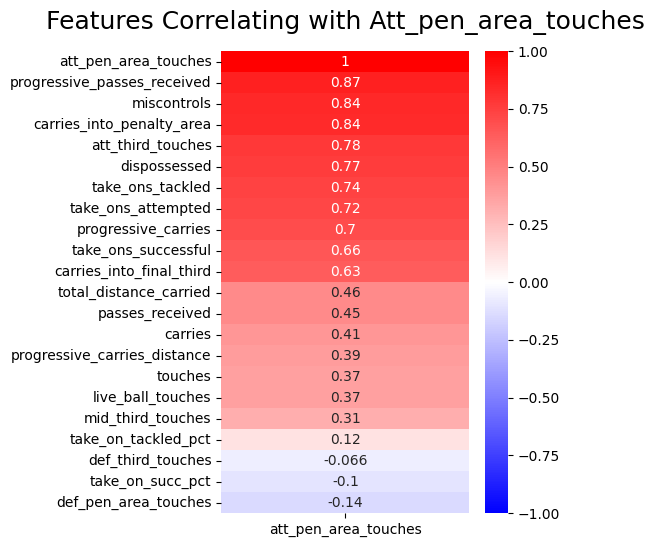

In [15]:
df_plots.dependent_correlations(y, X + [y], save_to=None)